In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk 
import re 

from sklearn.cluster import KMeans 
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import silhouette_score

In [3]:
import pandas as pd 
texts = pd.read_excel("texts_cluster.xlsx")

text = list(texts.Processed)
text_raw = list(texts.Raw)

texts.head(5)

,Raw,Processed
0,Отпуск 2020. Крым. Судак. Новый Свет. Феодосия.,отпуск 2020 крым судак новый свет феодосий
1,Г-гордость❣️ я очень довольна результатом. Оче...,год гордость очень довольный результат очень д...
2,"Лето, август, отпуск, но не у меня. В период...",лето август отпуск не_у период отпуск добавлят...
3,"Отпуск-2020. Никакого Лазурного берега, сплошн...",отпуск 2020 никакой лазурный берег сплошной ру...
4,Мой отпуск на море\n#бугазскаякоса #море #солц...,отпуск мор бугазскаякос мор солца отпуск отдых...


In [4]:
vectorizer = TfidfVectorizer(max_df = 0.75, min_df = 0.0005)
matrix = vectorizer.fit_transform(text)
matrix.shape

(33183, 5494)

Defining dimension of the matrix.

In [4]:
%%time
svd = TruncatedSVD(n_components = 2000)
features = svd.fit_transform(matrix)
explained_variance2 = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance2 * 100)))

Explained variance of the SVD step: 78%
Wall time: 3min 53s


In [5]:
%%time
svd = TruncatedSVD(n_components = 2500)
features = svd.fit_transform(matrix)
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 84%
Wall time: 4min 26s


In [6]:
%%time
svd = TruncatedSVD(n_components = 3000)
features = svd.fit_transform(matrix)
explained_variance3 = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance3 * 100)))

Explained variance of the SVD step: 88%
Wall time: 6min 15s


### KMeans

Defining the optimal number of clusters

In [8]:
%%time

svd = TruncatedSVD(n_components = 2500)
features = svd.fit_transform(matrix)

sum_of_squared_distances = []
coeffs = []

Wall time: 3min 53s


In [8]:
num_clusters = range(2, 16)

for n_cluster in num_clusters:
    print(n_cluster)
    
    t0 = time.time()
    method = KMeans(n_clusters=n_cluster)
    fit_pred = method.fit(features)
    
    inertia = method.inertia_
    sum_of_squared_distances.append(inertia)
    
    labels = method.labels_
    sil_coeff = silhouette_score(matrix, labels, metric='euclidean')
    coeffs.append(sil_coeff)
    print("For n_clusters={}, the Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
    t1 = time.time()
    
    times = t1 - t0 
    print("Required time:", " ", times)

2
For n_clusters=2, the Silhouette Coefficient is 0.007171124247398356
Required time:   176.43605852127075
3
For n_clusters=3, the Silhouette Coefficient is 0.005764289338615476
Required time:   263.99139380455017
4
For n_clusters=4, the Silhouette Coefficient is 0.006880832731760422
Required time:   253.33414840698242
5
For n_clusters=5, the Silhouette Coefficient is 0.005306271419831641
Required time:   425.6179106235504
6
For n_clusters=6, the Silhouette Coefficient is 0.005536550146026739
Required time:   305.8344693183899
7
For n_clusters=7, the Silhouette Coefficient is 0.0059838347996739195
Required time:   335.1245608329773
8
For n_clusters=8, the Silhouette Coefficient is 0.006905765227121507
Required time:   378.6860439777374
9
For n_clusters=9, the Silhouette Coefficient is 0.008325504412611887
Required time:   366.21774315834045
10
For n_clusters=10, the Silhouette Coefficient is 0.007234119111788916
Required time:   359.26146626472473
11
For n_clusters=11, the Silhouette C

Defining the optimal number of clusters: **the elbow method** 

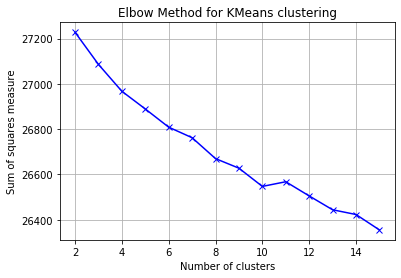

In [9]:
%matplotlib inline

plt.plot(num_clusters, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares measure')
plt.title('Elbow Method for KMeans clustering')

plt.grid(True)
plt.show()

Defining the optimal number of clusters: **the Silhouette Method** 

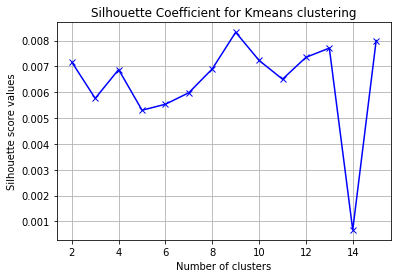

Optimal number of clusters is:   9


In [12]:
%matplotlib inline

plt.plot(num_clusters, coeffs, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score values')
plt.title('Silhouette Coefficient for Kmeans clustering')

plt.grid(True)
plt.show()

optimal_silhouette = num_clusters[coeffs.index(max(coeffs))]
print("Optimal number of clusters is:", " ", optimal_silhouette)

Fit Kmeans with the optimal number of clusters

In [9]:
best_K=9
model = KMeans(best_K)  
model.fit(features)  
clusters = model.labels_.tolist()

news = {'docs': text,'cluster': clusters}  
frame = pd.DataFrame(news, index = [clusters] , columns = ['cluster'])  

In [44]:
a = pd.DataFrame(model.labels_) 
a["Raw"] = text_raw 
a["Processed"] = text
a.head()

,0,Raw,Processed
0,4,Отпуск 2020. Крым. Судак. Новый Свет. Феодосия.,отпуск 2020 крым судак новый свет феодосий
1,0,Г-гордость❣️ я очень довольна результатом. Оче...,год гордость очень довольный результат очень д...
2,7,"Лето, август, отпуск, но не у меня. В период...",лето август отпуск не_у период отпуск добавлят...
3,4,"Отпуск-2020. Никакого Лазурного берега, сплошн...",отпуск 2020 никакой лазурный берег сплошной ру...
4,4,Мой отпуск на море\n#бугазскаякоса #море #солц...,отпуск мор бугазскаякос мор солца отпуск отдых...


Examine existing clusters

In [14]:
print('Number of documents per cluster')
frame['cluster'].value_counts()  

Number of documents per cluster


1    11600
0     5040
4     3537
8     3465
2     2443
6     2125
3     1838
7     1711
5     1424
Name: cluster, dtype: int64

In [15]:
text_tokens = []
for i in text: 
    tokens = i.split()
    for t in tokens: 
        text_tokens.append(t)

vocab_frame = pd.DataFrame({'words': text_tokens}, index = text_tokens)
vocab_frame.head(5)

,words
отпуск,отпуск
2020,2020
крым,крым
судак,судак
новый,новый


In [11]:
cluster_cen

array([[ 1.10278951e-01, -3.24420809e-02, -2.38848914e-02, ...,
        -4.32856269e-05, -9.14138002e-05, -3.03205607e-05],
       [ 1.18283994e-01, -4.76678397e-02, -8.57993585e-02, ...,
        -9.25113601e-05,  2.27304280e-05,  6.29812567e-05],
       [ 5.17064806e-02,  1.64974116e-02, -1.32397230e-02, ...,
        -4.84685718e-04, -1.41118855e-04, -4.20210742e-04],
       ...,
       [ 1.44966088e-01, -5.77883909e-02, -3.68258717e-02, ...,
         9.19320268e-05,  1.29263080e-04,  1.26920088e-04],
       [ 1.01084215e-01, -3.92855825e-02, -1.31998719e-01, ...,
         1.73673780e-04, -5.07514561e-05, -3.32319393e-05],
       [ 1.83898560e-01, -7.75377980e-02,  1.23494400e-01, ...,
         5.45782882e-05,  6.54072433e-05, -8.70235236e-05]])

In [47]:
cluster_cen = model.cluster_centers_
cluster_cen[0][:10]

array([ 0.11027895, -0.03244208, -0.02388489, -0.02121623,  0.0099545 ,
       -0.01713003,  0.0144986 , -0.0033778 , -0.00094295, -0.01136465])

In [37]:
order_centroids[0][::-1]

array([1, 2, 3, ..., 4, 6, 0], dtype=int64)

In [39]:
order_centroids[0][:25]

array([  0,   6,   4,  20,  41,  19,  18,  33,  28,  42,  30,  54,  13,
       123,  48,  16,  31,  85,  10, 145,  35,  23,  99, 125,  72],
      dtype=int64)

In [42]:
terms[72]

'happy'

In [48]:
terms

['000',
 '100',
 '1000',
 '120',
 '1200',
 '150',
 '1500',
 '200',
 '2000',
 '2010',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2020г',
 '2021',
 '300',
 '400',
 '500',
 '5000',
 '600',
 '800',
 'adler',
 'amazing',
 'and',
 'app',
 'art',
 'august',
 'beach',
 'beautiful',
 'beauty',
 'belarus',
 'bestoftheday',
 'black',
 'blacksea',
 'com',
 'cool',
 'covid',
 'covid19',
 'crimea',
 'cute',
 'day',
 'direct',
 'dream',
 'editor',
 'elena',
 'family',
 'familytime',
 'fashion',
 'fitness',
 'flowers',
 'follow',
 'followforfollowback',
 'followme',
 'for',
 'forest',
 'foto',
 'friends',
 'from',
 'fun',
 'gif',
 'girl',
 'girls',
 'good',
 'goodday',
 'goodmorning',
 'green',
 'handmade',
 'happiness',
 'happy',
 'holiday',
 'holidays',
 'home',
 'html',
 'insta',
 'instadaily',
 'instagood',
 'instagram',
 'instagramanet',
 'instalike',
 'instamood',
 'instaphoto',
 'instatag',
 'instatravel',
 'july',
 'june',
 'kaliningrad',
 'kazan',
 'khv',
 'kids',
 'l4l'

In [50]:
print("Top terms per cluster:")
original_space_centroids = svd.inverse_transform(model.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(9):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :25]:
        print(' %s' % terms[ind], end='')
        print()
        
# Есть ощущение, что проблема в векторайзере

Top terms per cluster:
Cluster 0: весь
 это
 день
 ещё
 работа
 свой
 время
 очень
 который
 год
 пойти
 хороший
 мочь
 хотеть
 человек
 спасибо
 самый
 наш
 сегодня
 план
 закончиться
 большой
 место
 просто
 ждать
Cluster 1: август
 запись
 июль
 девочка
 свободный
 планировать
 место
 остаться
 заранее
 сентябрь
 весь
 записаться
 время
 писать
 дорогой
 окошко
 день
 записываться
 дата
 конец
 ещё
 открытый
 свой
 работать
 ваш
Cluster 2: желанный
 незаменимый
 неповторимый
 сказочный
 необыкновенный
 загадочный
 необходимый
 долгожданный
 яркий
 лето
 отпуск2020
 манящий
 лето2020
 таинственный
 мор
 ждать
 vacation
 нужный
 жара
 солнце
 ура
 сочи
 отдых
 отпускятебязаслужить
 август2020
Cluster 3: 2020
 отдых
 семья
 отпуск2020
 сочи
 путешествие
 россия
 крым
 лето2020
 день
 красота
 природа
 гора
 наш
 июль
 весь
 алтай
 любимый
 область
 отдыхать
 питер
 анапа
 прогулка
 год
 озеро
Cluster 4: лето
 2020
 отдых
 summer
 жара
 лето2020
 июль
 солнце
 природа
 это
 семья
 день


In [45]:
a.to_csv("clust_kmeans.csv")

### DBSCAN

There are two hyper-parameters: **Eps** and **Min-points**. 

There no general rules on defining **Min-points**, and it's strictly depend on the data. Low **Min-points** means that the algorithm will build more clusters from noise, so this value shouldn't be too small. The [heuristic approach]( https://stackoverflow.com/questions/12893492/choosing-eps-and-minpts-for-dbscan-r/48558030#) is to use $ln(n)$, where n -- is the number of points to cluster. So, I'm using 9 as a starting point for the parameter. To define **Eps** I'm using k-distance plot.

In [36]:
from sklearn.neighbors import NearestNeighbors

In [37]:
k = 9 
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(features)
distances, indices = nbrs.kneighbors(features)

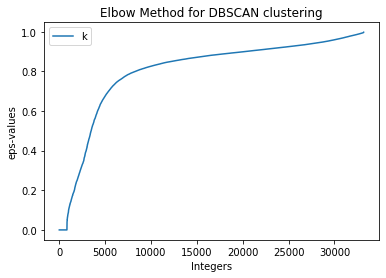

In [38]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title("Elbow Method for DBSCAN clustering")
plt.xlabel('Integers')
plt.ylabel('eps-values')
plt.legend('kneee')